In [1]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=a79e91d6dbb3fe023dcf68be6dfd7eb7991e0ead251ee668ca084bff477fb633
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=10b67944a172603ed1d80840e6ef85ed0741fc716131d80bbbc3357c76309d2d
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython-input-12-342b1e0345ee>:31: RuntimeWarning: divide by zero encountered in divide
  noise_data = df / random_dropout
<ipython

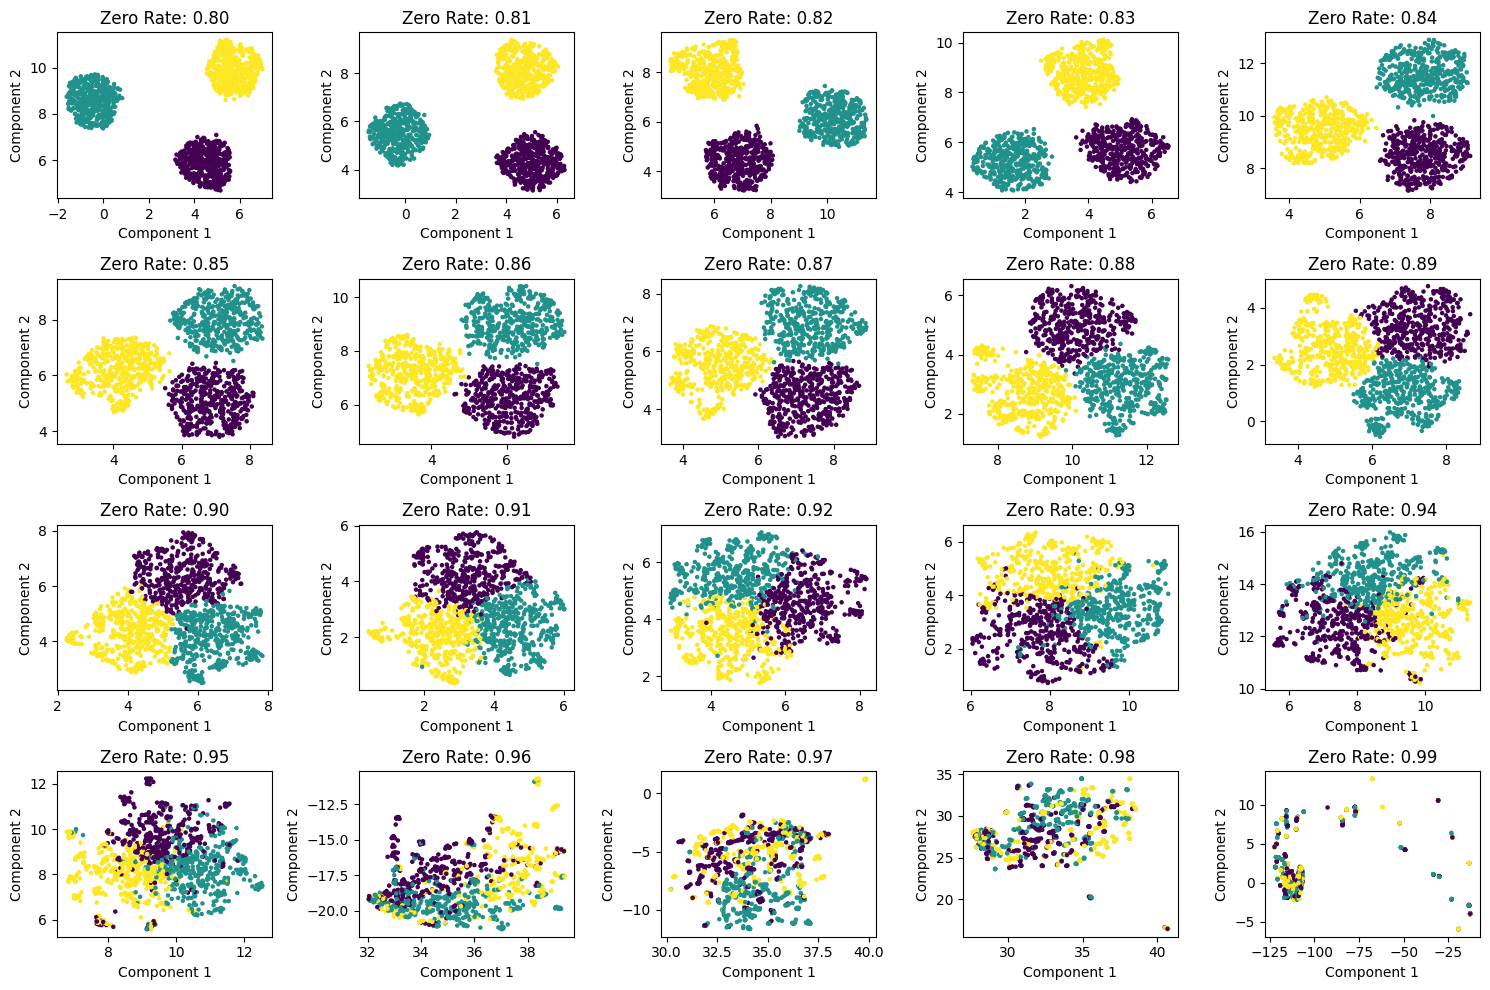

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Function to create blob data with a specific rate of zeros
def create_blob_data(n_samples, n_features, clusters, zero_rate, seed):
    data, labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=clusters, random_state=42)

    # Apply matrix dropout to introduce zeros into the dataset
    data = matrix_dropout(data, zero_rate, seed)

    return data, labels

# Function for matrix dropout
def matrix_dropout(df, por_drop, seed):
    if 0 < por_drop < 1:
        shape = df.shape[0] * df.shape[1]
        zeros = shape * por_drop
        ones = shape * (1 - por_drop)
        zeros = round(zeros)
        ones = round(ones)
        random_0 = np.zeros(zeros)
        random_1 = np.ones(ones)

        random_dropout = np.append(random_0, random_1)
        random_dropout = np.random.RandomState(seed=seed).permutation(random_dropout)
        random_dropout = random_dropout.reshape(df.shape)

        noise_data = df / random_dropout
        noise_data = np.nan_to_num(noise_data, nan=0, posinf=0, neginf=0)

        return noise_data
    else:
        print('The dropout rate must be a percentage, a number less than 1 and more than 0')
        return df

# Specified zero rates, updated to range from 0.8 to 0.99
zero_rates = np.linspace(0.8, 0.99, 20)

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# Create and visualize blobs for each zero rate
for index, zero_rate in enumerate(zero_rates):
    blob_data, labels = create_blob_data(1300, 100, 3, zero_rate, seed=42)

    # Scale the data
    scaler = StandardScaler()
    blob_data = scaler.fit_transform(blob_data)

    # Apply UMAP to reduce dimensionality to 2D
    reducer = umap.UMAP(n_neighbors=30, min_dist=0.1)
    embedding = reducer.fit_transform(blob_data)

    # Add a subplot to the figure
    plt.subplot(4, 5, index + 1)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=5, cmap='viridis')
    plt.title(f'Zero Rate: {zero_rate:.2f}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()


